# uDALES Urban Surface Creation with Python

uDALES supports several methods to create urban surfaces. It is possible to run uDALES without specifying an urban surface (flat terrain is assumed), but in most cases an urban surface will be specified.

This tutorial covers:

### Geometry Generation Functions
- **create_flat_surface**: Create flat surface with triangular facets
- **create_canyons**: Create one-dimensional street canyons
- **create_cubes**: Create cubes (single or arrays)
- **create_realistic**: Create realistic urban surface from buildings + ground

### The UDGeom Class
- **load**: Load STL file
- **save**: Save STL file  
- **show**: Display geometry in 3D
- Properties: n_faces, n_vertices, bounds, volume, total_area, etc.

## 1. Import Libraries and Setup

In [14]:
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

# Add the uDALES python path
udbase_path = Path("C:/Users/mvr/OneDrive - Imperial College London/codes/uDALES/u-dales").resolve()
tools_path = (udbase_path / "tools" / "python").resolve()
if tools_path not in sys.path:
    sys.path.insert(0, str(tools_path))

from udgeom import UDGeom
from udgeom import (
    create_flat_surface,
    create_canyons,
    create_cubes,
    create_realistic,
)

# Enable interactive plots
%matplotlib widget

## 2. The UDGeom Class

The UDGeom class represents uDALES urban surfaces and provides methods to load, save, and visualize STL files.

In [15]:
# Example: create a udgeom instance
geom = UDGeom()

# Show available methods
help(geom.load)
help(geom.save)
help(geom.show)

Help on method load in module udgeom.udgeom:

load(filename: str) method of udgeom.udgeom.UDGeom instance
    Load geometry from an STL file.

    Parameters
    ----------
    filename : str
        Name of the STL file to load (relative to self.path)

    Raises
    ------
    FileNotFoundError
        If the STL file does not exist
    ValueError
        If the file cannot be loaded as a valid mesh

    Examples
    --------
    >>> geom = UDGeom('experiments/001')
    >>> geom.load('geometry.001')

Help on method save in module udgeom.udgeom:

save(filename: str) method of udgeom.udgeom.UDGeom instance
    Save geometry to an STL file.

    Parameters
    ----------
    filename : str
        Name of the STL file to save (relative to self.path)

    Raises
    ------
    ValueError
        If no geometry is loaded

    Examples
    --------
    >>> geom.save('modified_geometry.stl')

Help on method show in module udgeom.udgeom:

show(color_buildings: bool = True, plot_quiver: bool 

In [16]:
help(UDGeom)

Help on class UDGeom in module udgeom.udgeom:

class UDGeom(builtins.object)
 |  UDGeom(path: Union[str, pathlib.Path, NoneType] = None, stl: Optional[ForwardRef('trimesh.Trimesh')] = None)
 |
 |  Geometry class for uDALES.
 |
 |  This class handles triangulated surface geometries (STL files) used in
 |  uDALES simulations. It provides methods for loading, saving, and visualizing
 |  3D geometries.
 |
 |  Parameters
 |  ----------
 |  path : str or Path, optional
 |      Path to the directory containing geometry files. Defaults to current directory.
 |  stl : trimesh.Trimesh, optional
 |      Pre-existing trimesh object to initialize with.
 |
 |  Attributes
 |  ----------
 |  path : Path
 |      Directory path for geometry files
 |  stl : trimesh.Trimesh or None
 |      Triangulated surface geometry
 |
 |  Examples
 |  --------
 |  Load a geometry from STL file:
 |  >>> geom = UDGeom('path/to/simulation')
 |  >>> geom.load('geometry.stl')
 |  >>> geom.show()
 |
 |  Create from existing

## 3. create_flat_surface: Creating Flat Surfaces

In [17]:
help(create_flat_surface)

Help on function create_flat_surface in module udgeom.geometry_generation:

create_flat_surface(xsize: float, ysize: float, edgelength: float) -> udgeom.udgeom.UDGeom
    Create a flat surface consisting of triangular facets (MATLAB createFlatSurface).



Faces: 128
Vertices: 81
Bounds: [[ 0.  0.  0.]
 [96. 96.  0.]]
Total area: 9216.00 m²


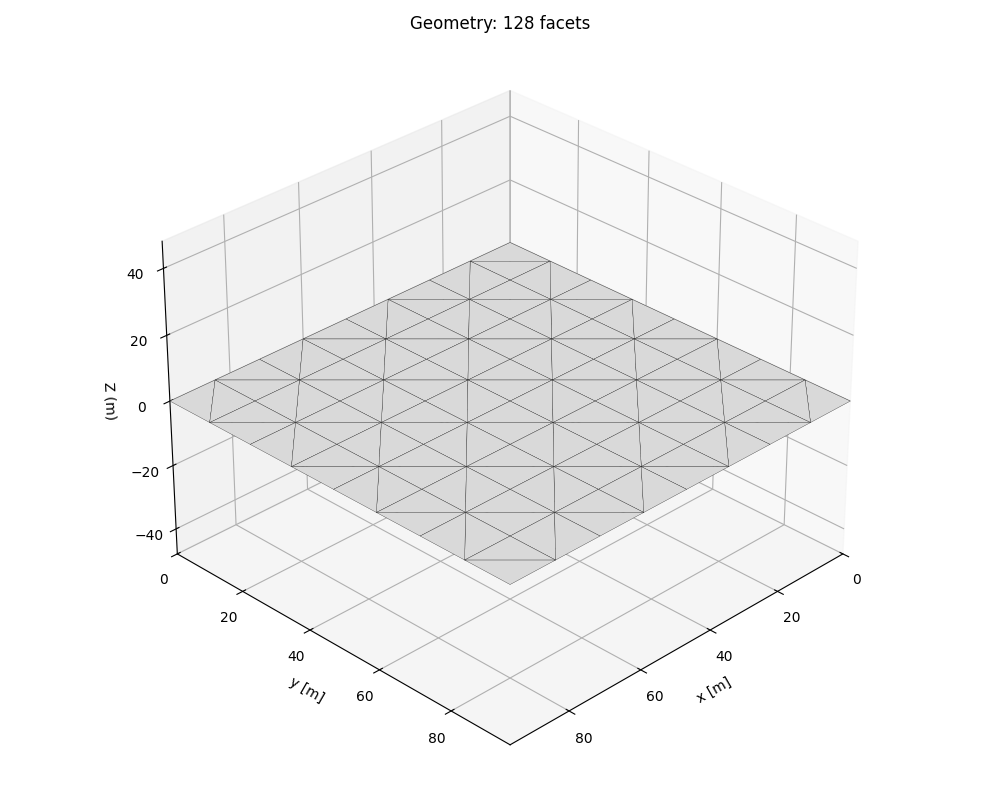

Saved geometry to: c:\Users\mvr\OneDrive - Imperial College London\codes\uDALES\u-dales\tools\python\examples\flat_surface.stl


In [18]:
# Create flat surface
xsize = 96
ysize = 96
edgelength = xsize / 8  # 12m facets

geom = create_flat_surface(xsize, ysize, edgelength)

print(f"Faces: {geom.n_faces}")
print(f"Vertices: {geom.n_vertices}")
print(f"Bounds: {geom.bounds}")
print(f"Total area: {geom.total_area:.2f} m²")

# Visualize
geom.show()
# Save to file
geom.save('flat_surface.stl')

## 4. create_canyons: Creating Street Canyons

In [19]:
help(create_canyons)

Help on function create_canyons in module udgeom.geometry_generation:

create_canyons(xsize: float, ysize: float, B: float, W: float, H: float, shift: float, edgelength: float, rotate90: bool = False) -> udgeom.udgeom.UDGeom
    Create one-dimensional street canyons (MATLAB createCanyons).



Building: 12m × 96m × 16m
Street width: 12m
H/W ratio: 1.33
Number of faces: 1280
Volume: 73728.00 m³


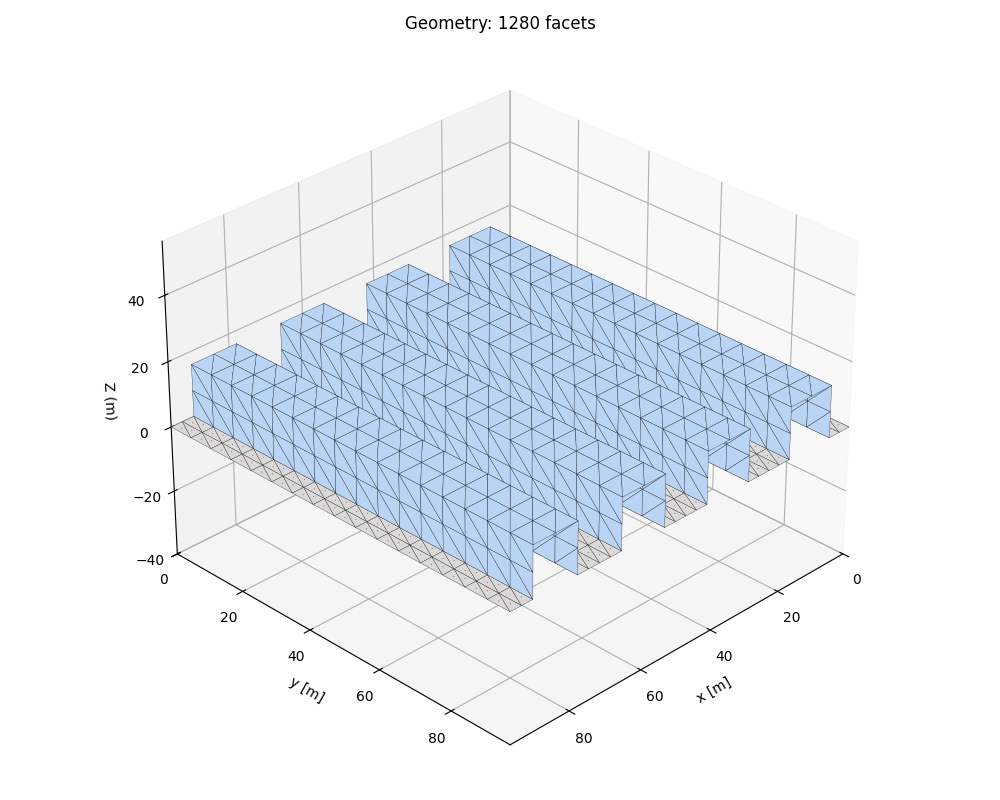

Saved geometry to: c:\Users\mvr\OneDrive - Imperial College London\codes\uDALES\u-dales\tools\python\examples\canyon.stl


In [20]:
xsize = 96
ysize = 96
B = 12   # building width
W = 12   # street width
H = 16   # building height

geom = create_canyons(
    xsize=xsize,
    ysize=ysize,
    B=B,
    W=W,
    H=H,
    shift=0,        # shift canyons in x (0 for none)
    edgelength=6,
    rotate90=False   # set True to rotate 90° about z if you want the other orientation
)

print(f"Building: {B}m × {ysize}m × {H}m")
print(f"Street width: {W}m")
print(f"H/W ratio: {H/W:.2f}")
print(f"Number of faces: {geom.n_faces}")
print(f"Volume: {geom.volume:.2f} m³")
geom.show()
geom.save('canyon.stl')

## 5. create_cubes: Creating Cube Geometries

In [21]:
help(create_cubes)

Help on function create_cubes in module udgeom.geometry_generation:

create_cubes(xsize: float, ysize: float, Hx: float, Hy: float, Hz: float, Cx: float, Cy: float, geom_option: str, edgelength: float) -> udgeom.udgeom.UDGeom
    Create cubes: single, aligned, or staggered (MATLAB createCubes).

    Parameters
    ----------
    xsize, ysize : float
        Domain size in meters (x, y).
    Hx, Hy, Hz : float
        Cube lengths in x, y and height z.
    Cx, Cy : float
        Spacing between cubes in x and y directions (ignored for single cube).
    geom_option : {'S','AC','SC'}
        'S'  - single cube centred in the domain.
        'AC' - aligned array on a regular grid.
        'SC' - staggered array (alternate rows shifted by half spacing).
    edgelength : float
        Target facet size; controls subdivision level.

    Raises
    ------
    ValueError
        If domain is not an integer multiple of cube+spacing for AC/SC,
        or if geom_option is invalid.



Single cube: 512 faces
z-range: 0.0 16.0
bounds: [[ 0.  0.  0.]
 [96. 96. 16.]]


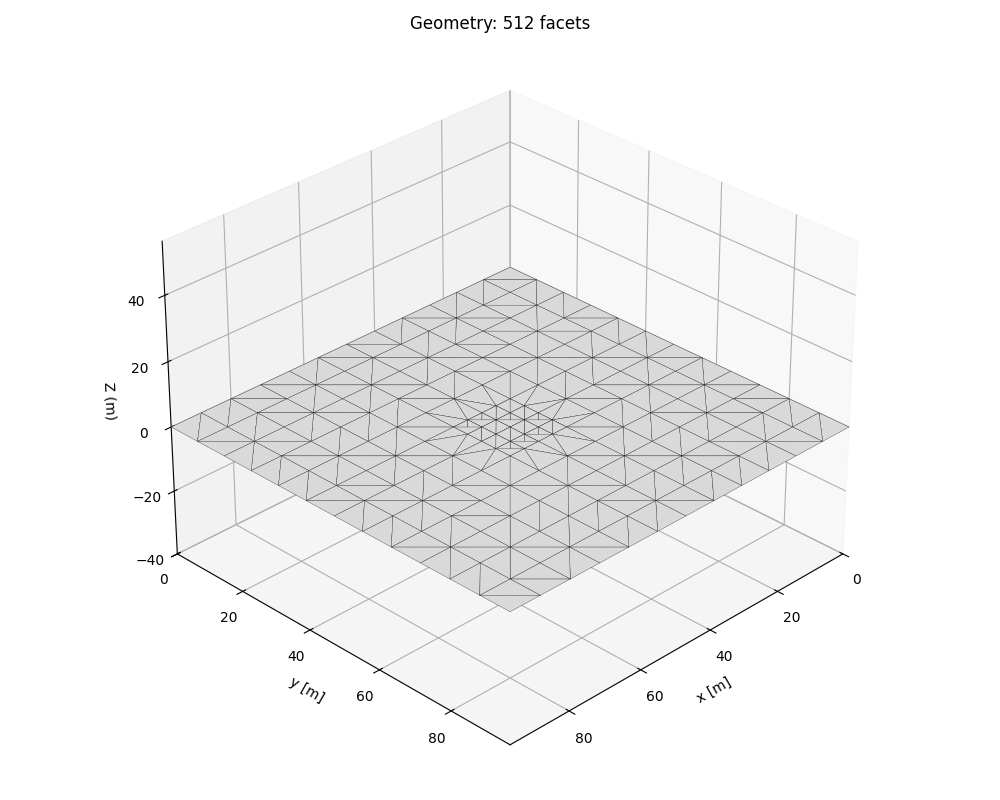

Saved geometry to: c:\Users\mvr\OneDrive - Imperial College London\codes\uDALES\u-dales\tools\python\examples\single_cube.stl


In [22]:
# Single cube
geom_single = create_cubes(96, 96, 16, 16, 16, 0, 0, geom_option='S', edgelength=8)
print(f"Single cube: {geom_single.n_faces} faces")
verts = geom_single.stl.vertices
print("z-range:", verts[:,2].min(), verts[:,2].max())
print("bounds:", geom_single.bounds)

geom_single.show()
geom_single.save('single_cube.stl')

Aligned array: 4032 faces


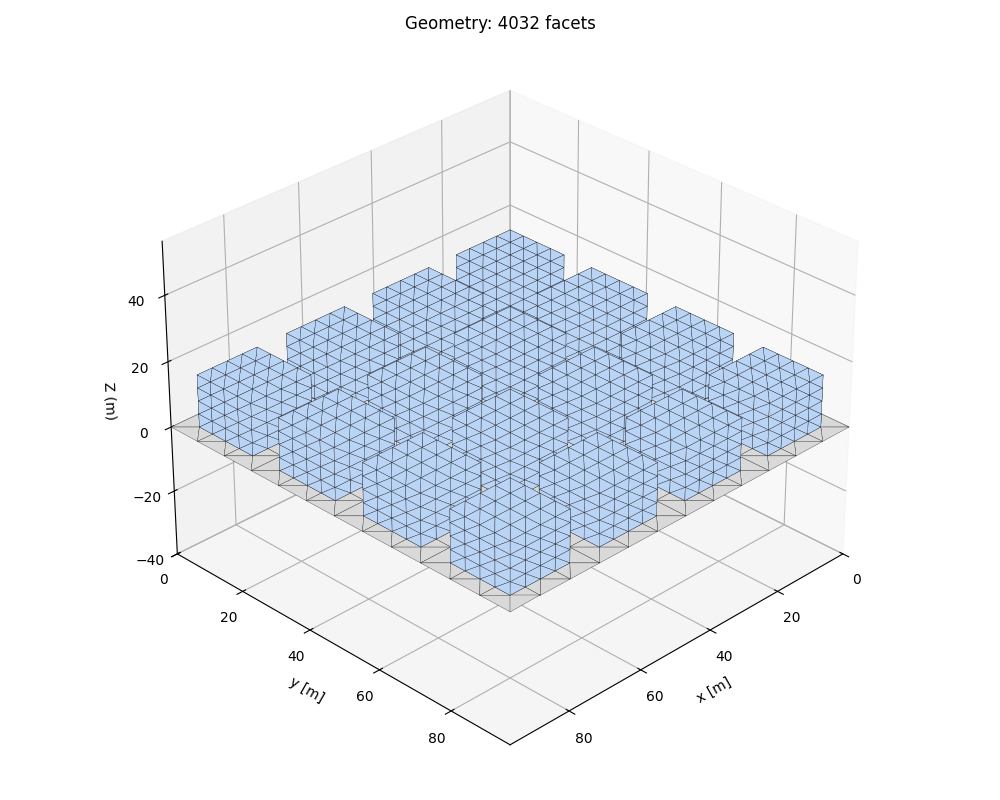

Saved geometry to: c:\Users\mvr\OneDrive - Imperial College London\codes\uDALES\u-dales\tools\python\examples\aligned_cubes.stl


In [23]:

# Aligned array
geom_aligned = create_cubes(96, 96, 16, 16, 16, Cx=8, Cy=8, 
                            geom_option='AC', edgelength=8)
print(f"Aligned array: {geom_aligned.n_faces} faces")
geom_aligned.show()
geom_aligned.save('aligned_cubes.stl')


Staggered array: 3770 faces


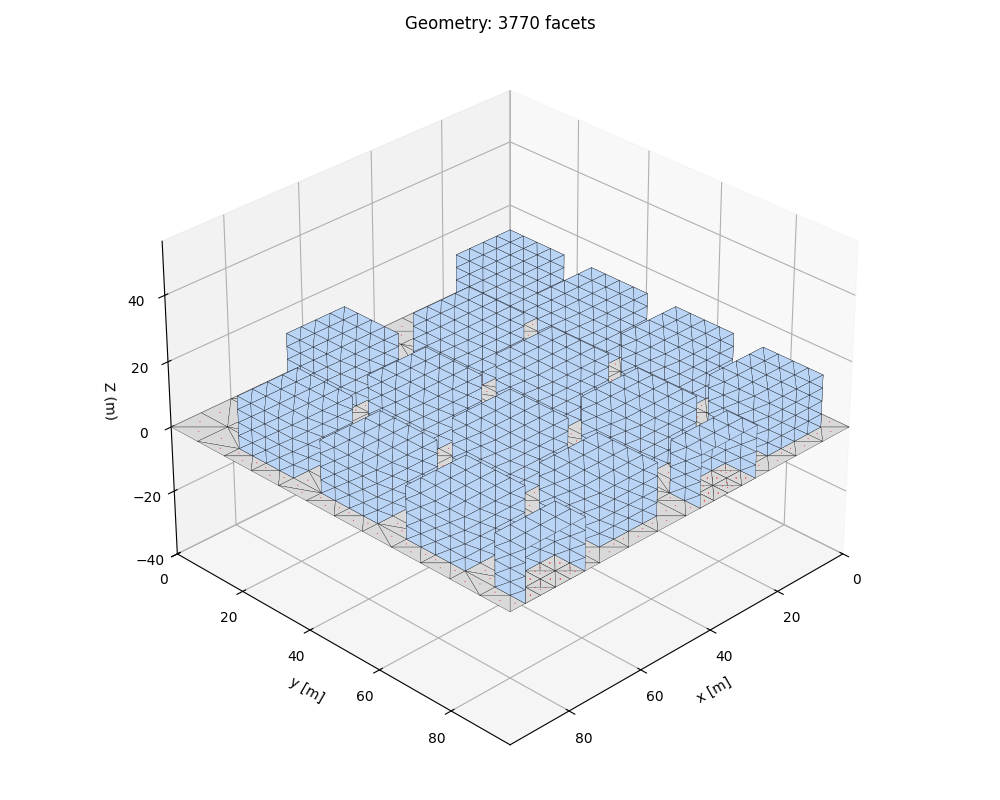

Saved geometry to: c:\Users\mvr\OneDrive - Imperial College London\codes\uDALES\u-dales\tools\python\examples\staggered_cubes.stl


In [24]:

# Staggered array
geom_staggered = create_cubes(96, 96, 16, 16, 16, Cx=8, Cy=8,
                              geom_option='SC', edgelength=8)
print(f"Staggered array: {geom_staggered.n_faces} faces")
geom_staggered.show()
geom_staggered.save('staggered_cubes.stl')

## 6. create_realistic: Realistic Urban Layouts

In [25]:
help(create_realistic)

Help on function create_realistic in module udgeom.geometry_generation:

create_realistic(stlfile: pathlib.Path, xsize: float, ysize: float, shift: Tuple[float, float, float], edgelength: float) -> udgeom.udgeom.UDGeom
    Create a realistic urban surface by loading buildings from STL and adding ground.
    Mirrors MATLAB createRealistic.



In [26]:
# Create realistic layout from building list
buildings = [
    {'x': 10, 'y': 10, 'width': 20, 'length': 20, 'height': 15},
    {'x': 40, 'y': 10, 'width': 15, 'length': 25, 'height': 20},
    {'x': 10, 'y': 45, 'width': 25, 'length': 15, 'height': 18},
    {'x': 50, 'y': 50, 'width': 20, 'length': 20, 'height': 12},
]

geom = create_realistic(
    buildings=buildings,
    domain_size=(96, 96),
    edgelength=8,
    add_ground=True
)

print(f"Number of buildings: {len(buildings)}")
print(f"Number of faces: {geom.n_faces}")
print(f"Volume: {geom.volume:.2f} m³")

geom.save('realistic.stl')

TypeError: create_realistic() got an unexpected keyword argument 'buildings'

## 7. Workflow and Best Practices

### Typical Workflow

1. **Choose geometry type** based on your research question
   - Flat surface: Simple benchmark cases
   - Canyons: 2D flow studies, idealized urban canyons
   - Cubes: Array studies, parametric investigations
   - Realistic: Real urban layouts, specific locations

2. **Create geometry** using appropriate function

3. **Inspect properties**
   ```python
   print(f"Faces: {geom.n_faces}")
   print(f"Volume: {geom.volume:.2f} m³")
   print(f"Area: {geom.total_area:.2f} m²")
   ```

4. **Visualize** to verify correctness
   ```python
   geom.show()
   plt.show()
   ```

5. **Save to STL** for use in simulations
   ```python
   geom.save('geometry.stl')
   ```

### Important Considerations

- **Facet size**: Ground facet size affects mesh resolution. Smaller = more detail but more facets
- **Domain size**: Ensure periodic boundaries work correctly (buildings should fit evenly)
- **Height**: First grid cell above buildings should have sufficient resolution
- **Coordinates**: Origin (0,0) is typically domain corner; buildings positioned relative to this

## 8. Summary

### Geometry Generation Functions

| Function | Use Case | Key Parameters |
|----------|----------|----------------|
| `create_flat_surface` | Flat ground | xsize, ysize, edgelength |
| `create_canyons` | Street canyons | Building dims, spacing, orientation |
| `create_cubes` | Cube arrays | Cube size, spacing, option (S/AC/SC) |
| `create_realistic` | Real layouts | Buildings list, domain_size |

### UDGeom Class Capabilities
- ✅ Load/save STL files
- ✅ 3D visualization
- ✅ Geometry properties (area, volume, bounds)
- ✅ Facet-level data (centers, normals, areas)

### Next Steps
- **udbase_tutorial.ipynb** - Introduction to post-processing
- **fields_tutorial.ipynb** - Working with field data
- **facets_tutorial.ipynb** - Surface energy balance analysis
- `tools/python/geometry_example.py` - Complete geometry examples
- uDALES documentation: https://u-dales.readthedocs.io/

### Quick Reference
```python
# Create geometry
geom = create_cubes(96, 96, 16, 16, 16, Cx=8, Cy=8, geom_option='AC')

# Inspect
print(f"Faces: {geom.n_faces}, Volume: {geom.volume:.1f} m³")

# Visualize
geom.show()

# Save
geom.save('mygeometry.stl')
```